In [1]:
import torch
import numpy as np

import gymnasium as gym
import speederbikes_sim
from ddqn.DDQNAgent import Agent
from ddqn.DDQNTrainer import Trainer

Training with a script:

In [2]:
# !python train_ddqn.py

Training with interactive code:

In [3]:
# setup all components
sim_speedup = 10
env = gym.make('speederbikes/SpeederBikes-v0', render_mode="human", observation_mode="flatten",
                lvl_n_lanes=3, lvl_speed= 200 * sim_speedup, lvl_road_width= 350, 
                agt_speed= 200 * sim_speedup 
               )

obs, info = env.reset()
env.metadata["render_fps"] = 60 * sim_speedup

agent = Agent(env)

trainer = Trainer(agent, update_every=8, 
                #   epochs=10, validation_interval=1000
                  epochs=1000, validation_interval=20000
                  )

seed: 4


In [4]:
# for i in range(500):
#     s, r, term, trunc, info = env.step(np.random.randint(1,3))
# env.close()

In [4]:
trainer.start()

In [6]:
agent.save(trainer.storage_dir,agent.steps, inference=False)

In [6]:
env.close()

### Evaluation of a trained agent

In [7]:
# setup all components
sim_speedup = 10
env = gym.make('speederbikes/SpeederBikes-v0', render_mode="human", observation_mode="flatten",
                lvl_n_lanes=3, lvl_speed= 200 * sim_speedup, lvl_road_width= 350, 
                agt_speed= 200 * sim_speedup 
               )

obs, info = env.reset()
env.metadata["render_fps"] = 60 * sim_speedup

agent = Agent(env)
agent.load("./trained_models/") # load latest model (with most steps)

tester = Trainer(agent)

In [8]:
# display learning process
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<Axes: xlabel='sim_steps', ylabel='reward'>

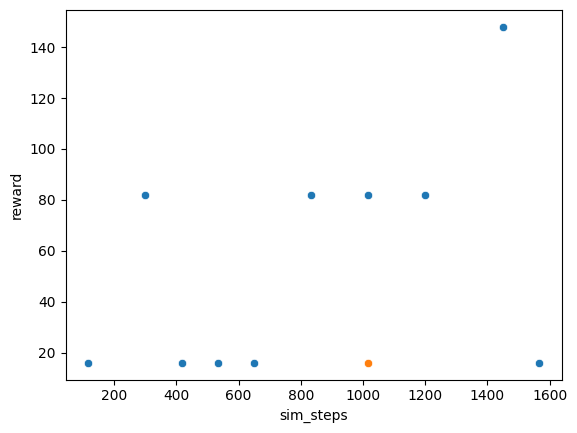

In [9]:
sns.scatterplot(tester.past_training_rewards, x="sim_steps", y="reward")
sns.scatterplot(tester.past_evaluation_scores, x="sim_steps", y="eval_score")

# plt.scatter(x=tester.past_evaluation_scores["sim_steps"].max(), y=tester.evaluate(5, aggregate=True))

In [4]:
env.close()


---

testing the env

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym
import speederbikes_sim

In [2]:
env = gym.make('speederbikes/SpeederBikes-v0', render_mode="rgb_array", observation_mode="rgb_array_flatten",
                lvl_n_lanes=3, lvl_speed= 200, lvl_road_width= 350, 
                agt_speed= 200 
               )

In [3]:
obs, inf = env.reset()

c:\Users\key\.conda\envs\RL\Lib\site-packages\gymnasium\utils\passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be int32, actual type: uint8
  logger.warn(


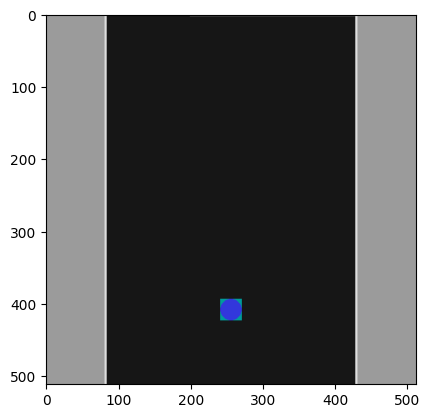

In [7]:
plt.imshow(obs.reshape(512, 512, 3))

In [17]:
env.close()

---